In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [5]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [8]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

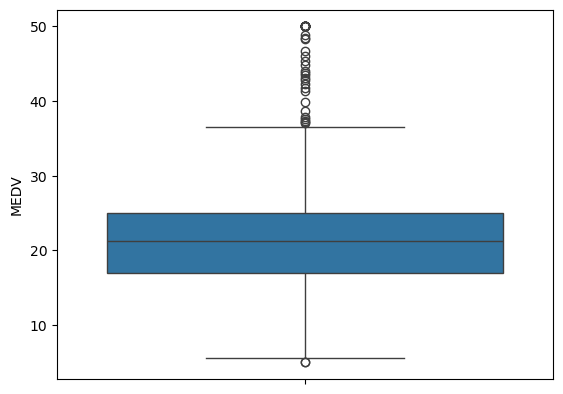

In [15]:
#For the "Median value of owner-occupied homes" provide a boxplot
ax=sns.boxplot(y='MEDV',data=boston_df)
plt.show()

- Provide a bar plot for the Charles river variable

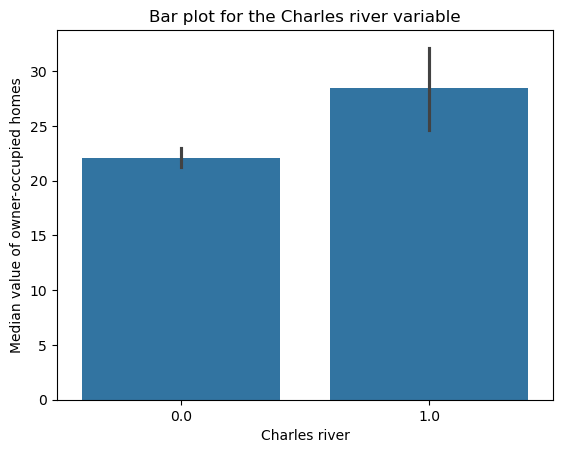

In [18]:
ax = sns.barplot(x="CHAS",y='MEDV', data=boston_df)
ax.set(xlabel='Charles river',ylabel='Median value of owner-occupied homes')
pyplot.title('Bar plot for the Charles river variable')
pyplot.show()

- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)



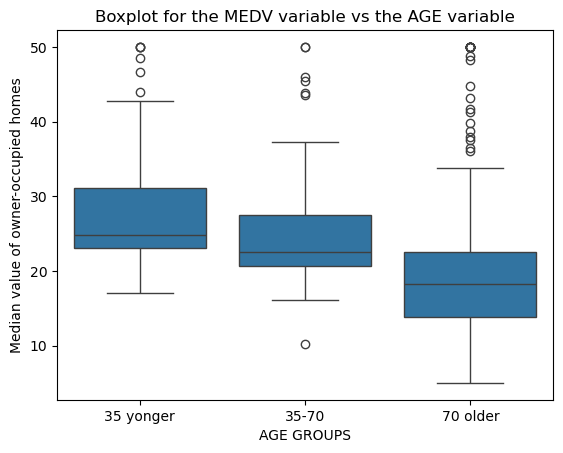

In [21]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 yonger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = '35-70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 older'
ax=sns.boxplot(x='age_group', y = 'MEDV', order =['35 yonger','35-70','70 older'], data=boston_df)
ax.set(xlabel='AGE GROUPS',ylabel='Median value of owner-occupied homes')
pyplot.title('Boxplot for the MEDV variable vs the AGE variable')
pyplot.show()

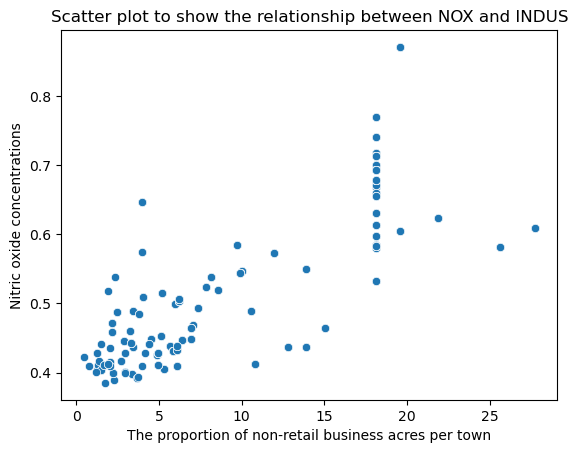

In [23]:
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax.set(xlabel='The proportion of non-retail business acres per town',ylabel='Nitric oxide concentrations')
pyplot.title('Scatter plot to show the relationship between NOX and INDUS')
pyplot.show()

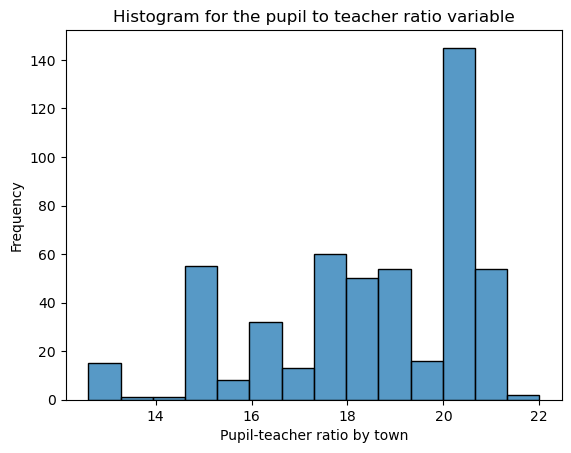

In [25]:
ax = sns.histplot(boston_df['PTRATIO'])
ax.set(xlabel='Pupil-teacher ratio by town', ylabel='Frequency')
pyplot.title('Histogram for the pupil to teacher ratio variable')
pyplot.show()

- Is there a significant difference in median value of houses bounded by the Charles river or not

In [28]:

Ttest_result=scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = True)
print('H_0: µ_MEDV euqals to µ_CHAS; H_1: µ_MEDV not equals to µ_CHAS')
print("p_value of the t-test =",Ttest_result[1],'less than 0.05 so we reject the null hypothesis')

H_0: µ_MEDV euqals to µ_CHAS; H_1: µ_MEDV not equals to µ_CHAS
p_value of the t-test = 7.390623170519902e-05 less than 0.05 so we reject the null hypothesis


- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [33]:
f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df['age_group']=='35 yonger']['MEDV'], boston_df[boston_df['age_group']=='35-70']['MEDV'], boston_df[boston_df['age_group']=='70 older']['MEDV'])
print('H_0: µ_1 = µ_2 = µ_3 (the three population means are equal)','\nH_1:At least one of the means differ')
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))
print('Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.')

H_0: µ_1 = µ_2 = µ_3 (the three population means are equal) 
H_1:At least one of the means differ
F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15
Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.


- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)m

In [38]:
pearson_result=scipy.stats.pearsonr(boston_df['INDUS'],boston_df['NOX'])
print('Pearson coefficient =',pearson_result[0],
      '\nSo the Nitric oxide concentrations and the proportion of non-retail business acres per town have a strong positive relationship')
print('p-value =',pearson_result[1])

Pearson coefficient = 0.7636514469209157 
So the Nitric oxide concentrations and the proportion of non-retail business acres per town have a strong positive relationship
p-value = 7.913361061236247e-98


In [40]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        19:04:10   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the correlation: we have and pearson R - p value is 1.21e-08, less than 0.05 there is evidence of correlation between beauty and evaluation scores